In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

image_4


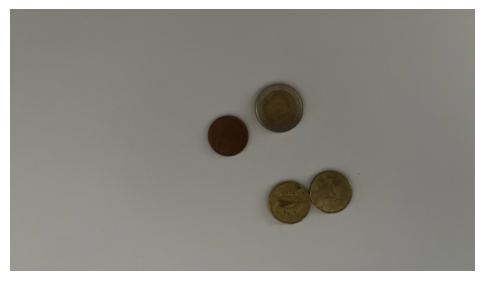

In [2]:
img_files = glob('imagenes/*jpg')

img_num = 3
img_n = os.path.basename(img_files[img_num]).split('.')[0]
print(img_n)

img = cv2.imread(f'imagenes/{img_n}.jpg')

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## cambiar a escala de gris y threshold

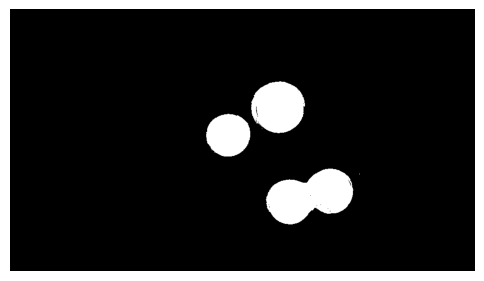

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## morphologyEx
eliminar pequeñas áreas de ruido en una imagen binaria

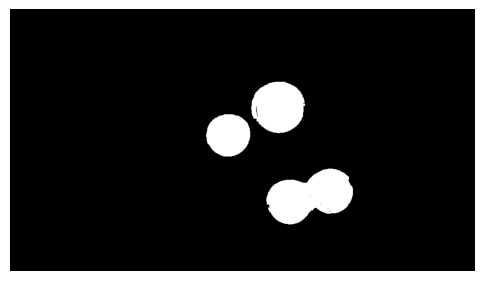

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
imgDilate = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) 

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgDilate, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

## distanceTransform
Distancia del píxel blanco más cercano a un píxel negro (contorno más cercano)

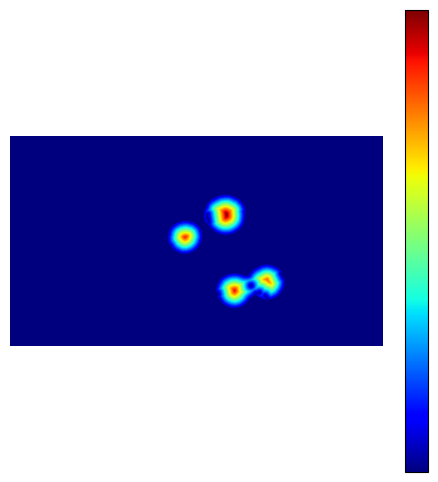

In [5]:
dist_transform = cv2.distanceTransform(imgDilate,cv2.DIST_L2,5)

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(dist_transform, cmap='jet')
ax.axis('off')
cbar = f.colorbar(im)  # Añade la barra de colores
cbar.ax.tick_params(labelsize=0)  
cbar.set_ticks([])
plt.show()

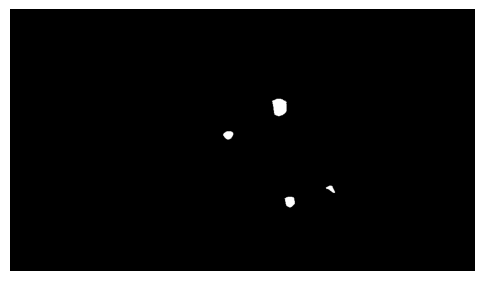

In [6]:
_, distThresh = cv2.threshold(dist_transform,35,255,cv2.THRESH_BINARY)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(distThresh, cmap='gray')
ax.axis('off')
plt.show()

[0 1 2 3 4]


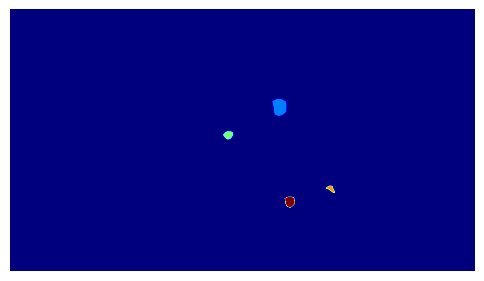

In [7]:
distThresh = np.uint8(distThresh)
_, labels = cv2.connectedComponents(distThresh)

print(np.unique(labels))

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(labels, cmap='jet')
ax.axis('off')
plt.show()

Unique labels before watershed: [0 1 2 3 4]
[0 1 2 3 4]


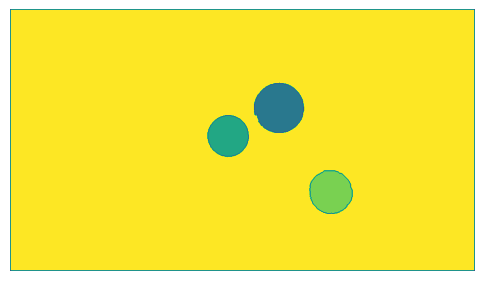

In [8]:
print("Unique labels before watershed:", np.unique(labels))

labels = np.int32(labels)
print(np.unique(labels))

labels = cv2.watershed(img, labels)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(labels)
ax.axis('off')
plt.show()


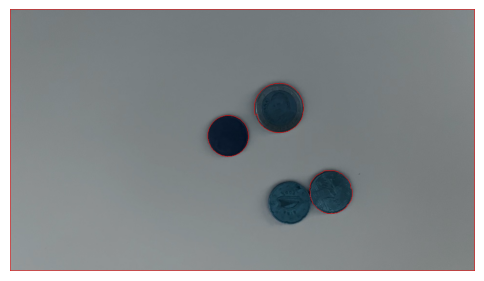

In [9]:
img[labels==-1] = [255, 0, 0]
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')
plt.show()